# Задание 2

In [1]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import cosine

import matplotlib
from matplotlib import pyplot as plt

Почему-то statsmodels не импортятся в юпитере, поэтому закостылим всю логику в python-скрипт и сохраним результаты в csv.

In [2]:
!python main.py --split_date "2021-01-22"

First exchange dataset
/Users/dmitry/.conda/envs/hse_prod_hw2v2/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
Baseline inference took 0.01 seconds
ARIMA inference took 80.64 seconds
Second exchange dataset
Baseline inferenc

Время считается на весь тест-датасет (около 600 таймстемпов)

In [3]:
res1 = pd.read_csv('data1_out.csv')
res2 = pd.read_csv('data2_out.csv')

res1['datetime'] = pd.to_datetime(res1['datetime'], format='%Y-%m-%d %H:%M:%S')
res1.set_index('datetime', inplace=True)

res2['datetime'] = pd.to_datetime(res2['datetime'], format='%Y-%m-%d %H:%M:%S')
res2.set_index('datetime', inplace=True)

## Первый датасет

### Косинусное расстояние для бейзлайна

In [4]:
cosine(res1['baseline'], res1['price'])

0.00122482104214916

### Косинусное расстояние для ARIMA

In [5]:
cosine(res1['arima'], res1['price'])

0.00038890093455934416

## Второй датасет

### Косинусное расстояние для бейзлайна

In [6]:
cosine(res2['baseline'], res2['price'])

0.0005980584051440418

### Косинусное расстояние для ARIMA

In [7]:
cosine(res2['arima'], res2['price'])

0.000781475908149476

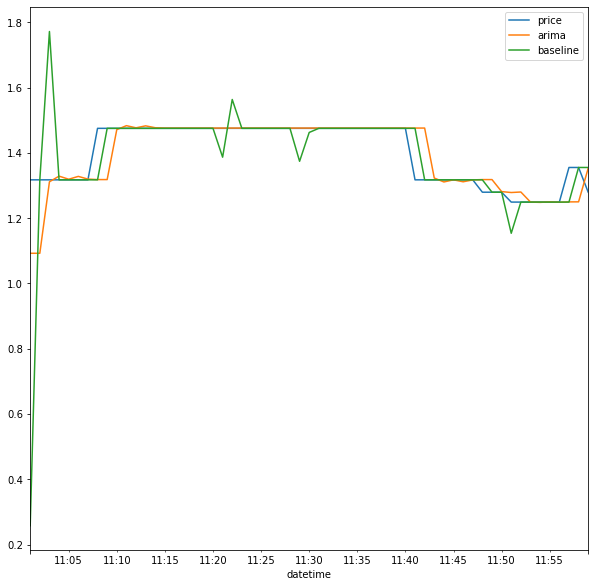

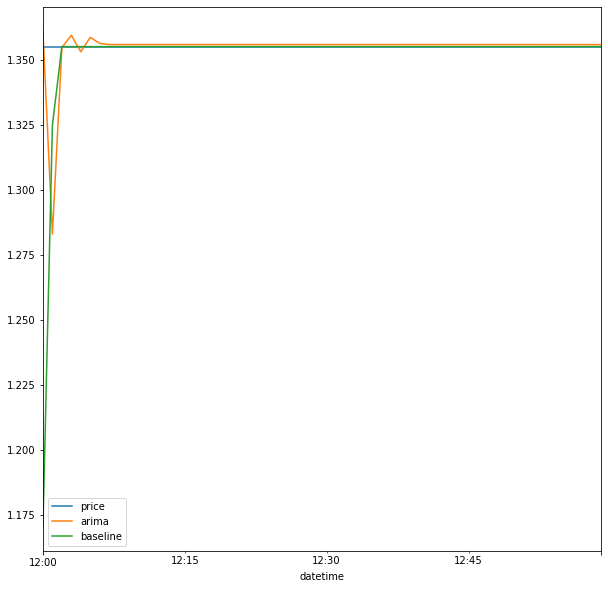

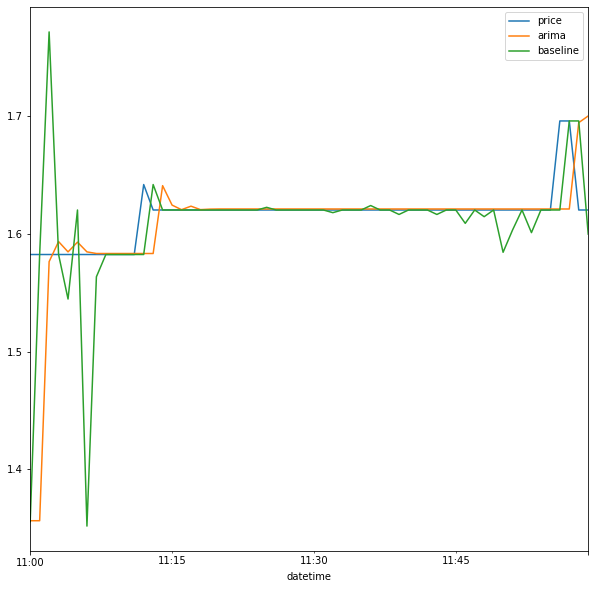

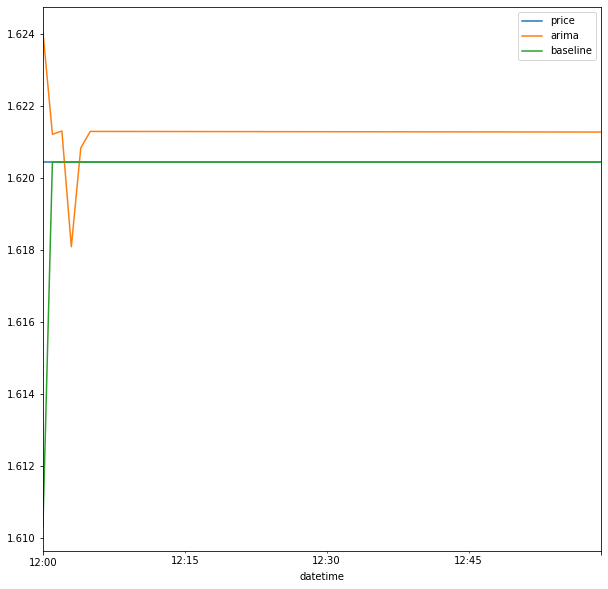

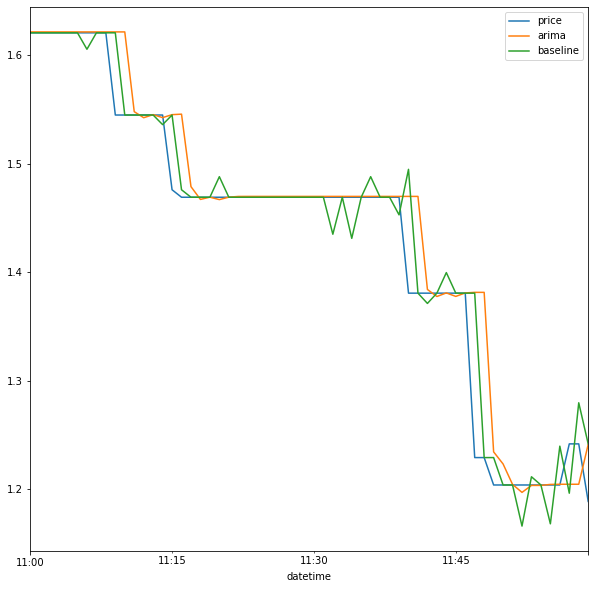

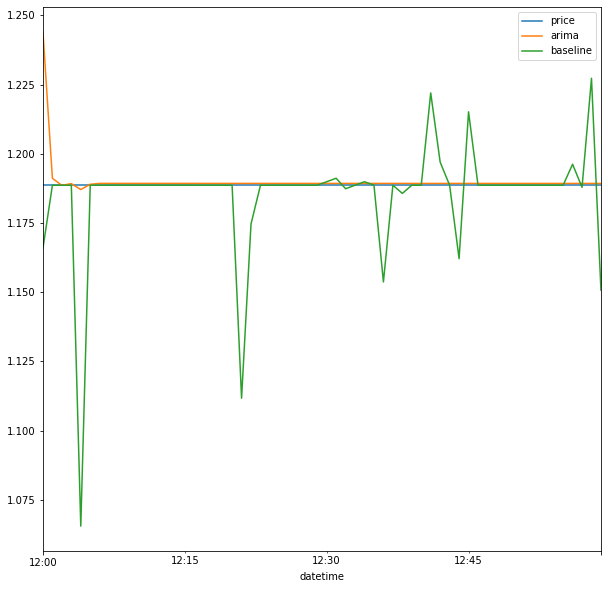

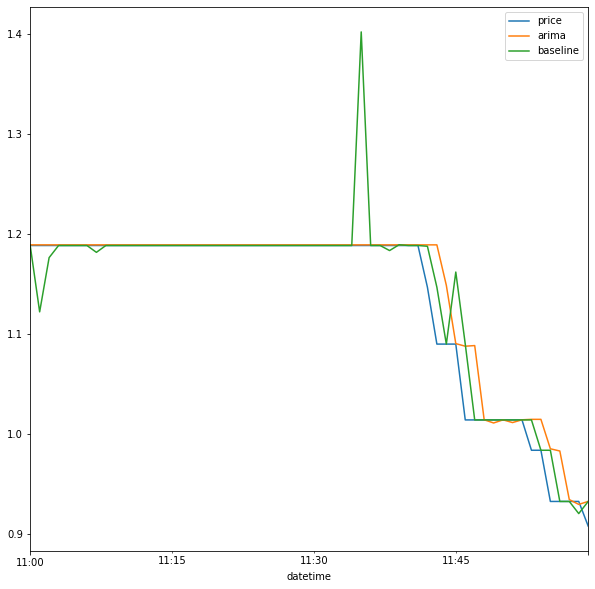

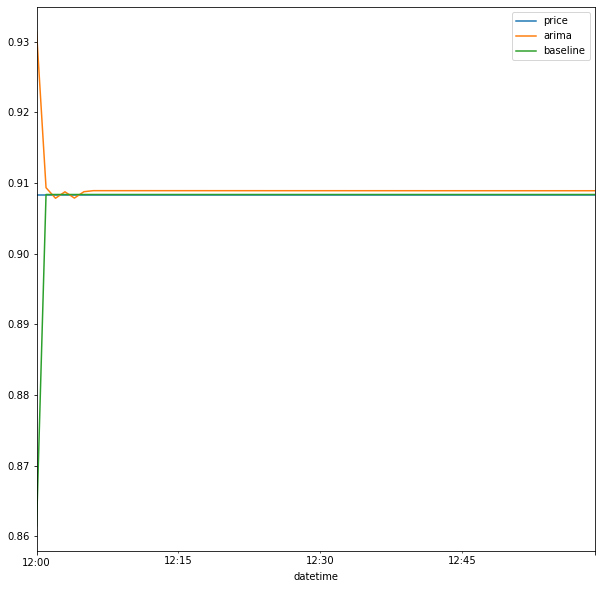

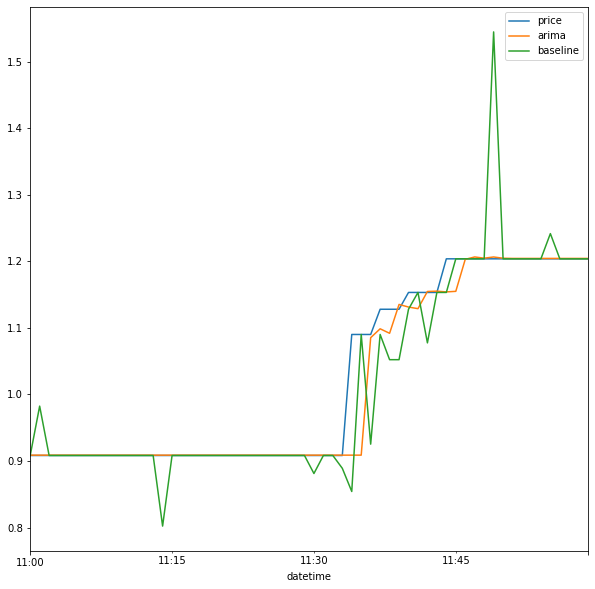

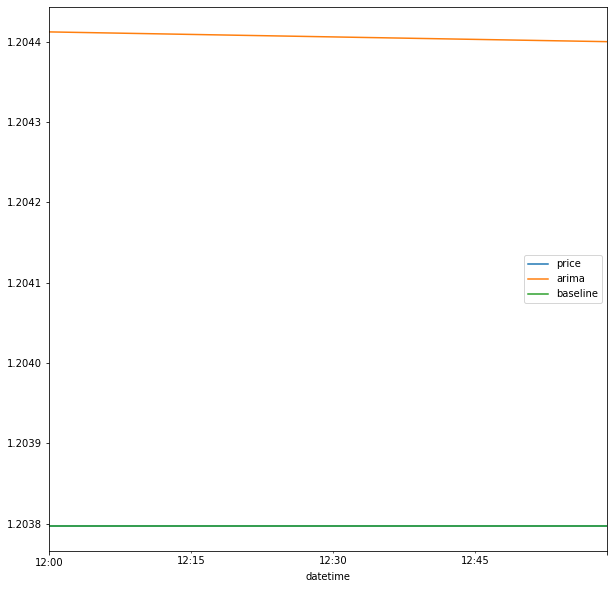

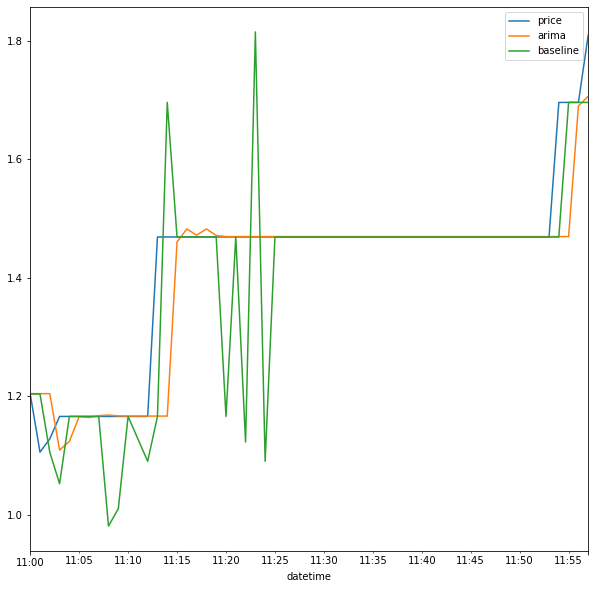

In [8]:
res1.groupby('session_id')[['price', 'arima', 'baseline']].plot(figsize=(10, 10));

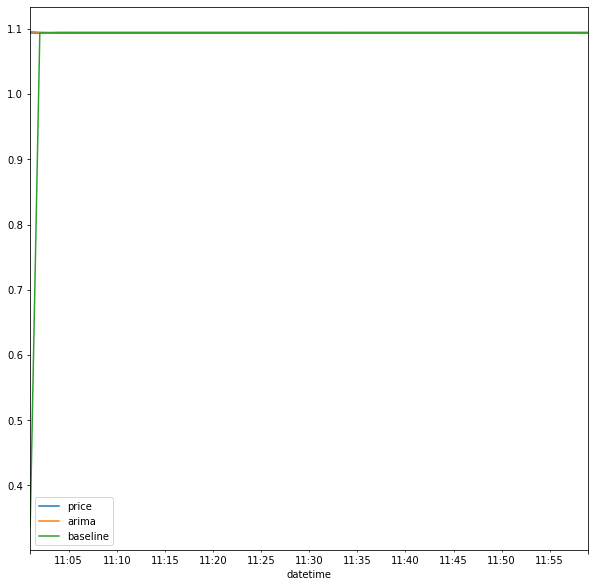

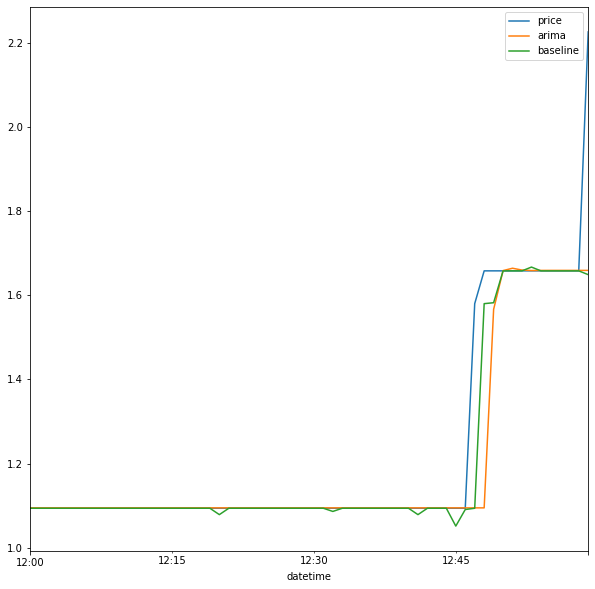

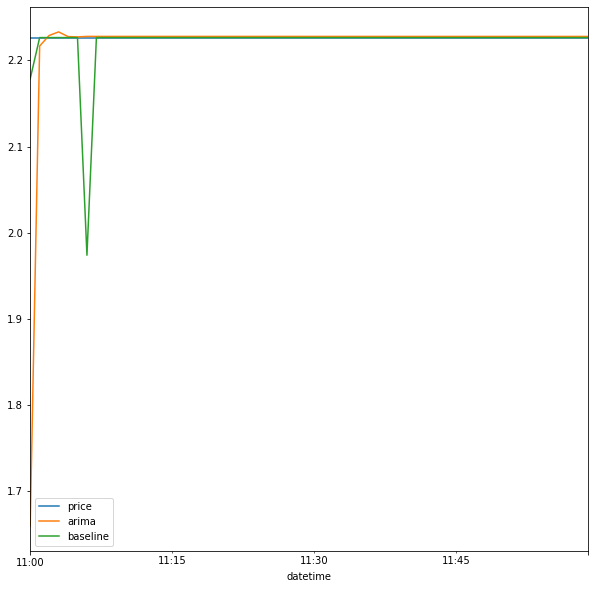

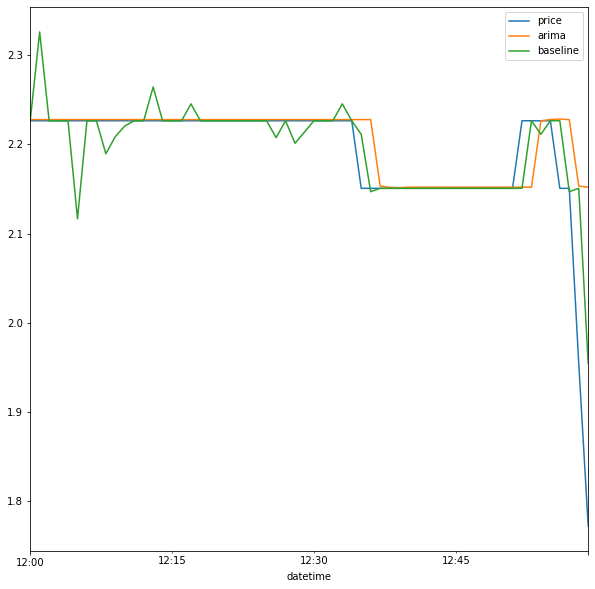

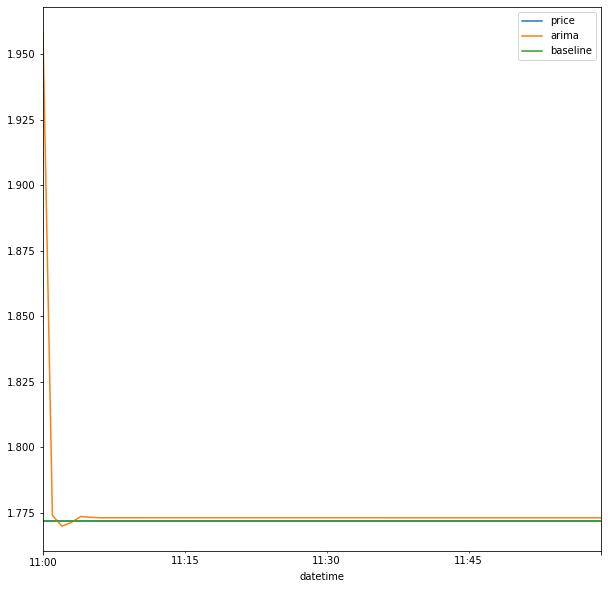

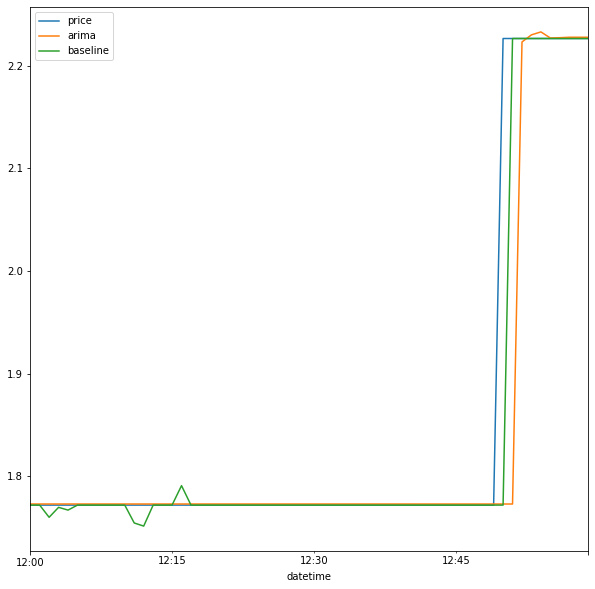

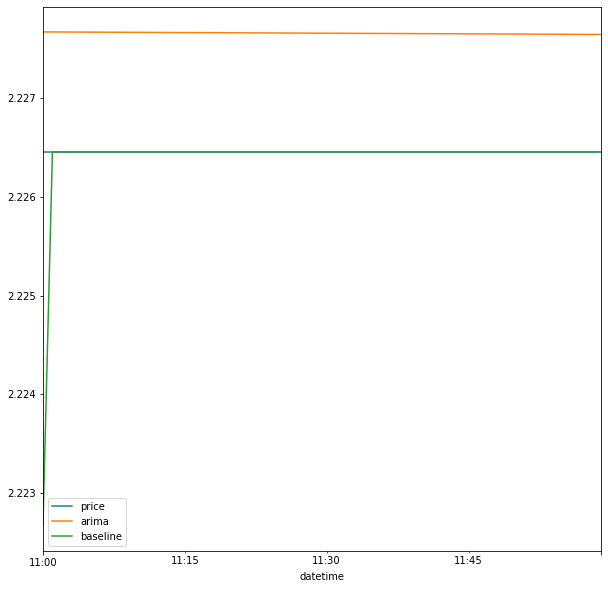

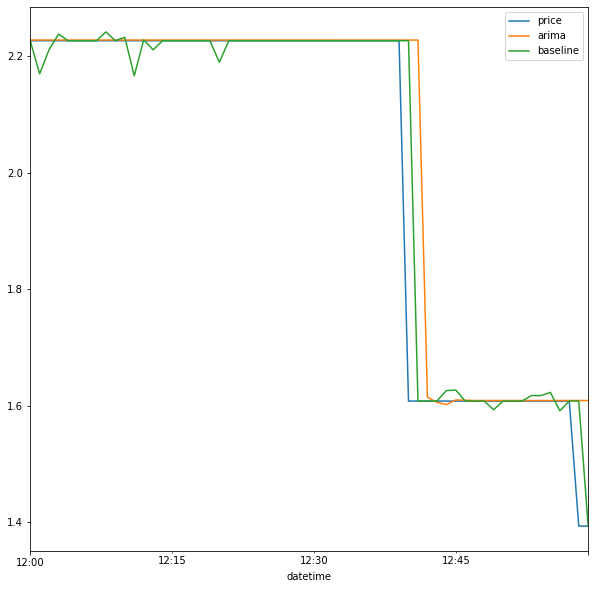

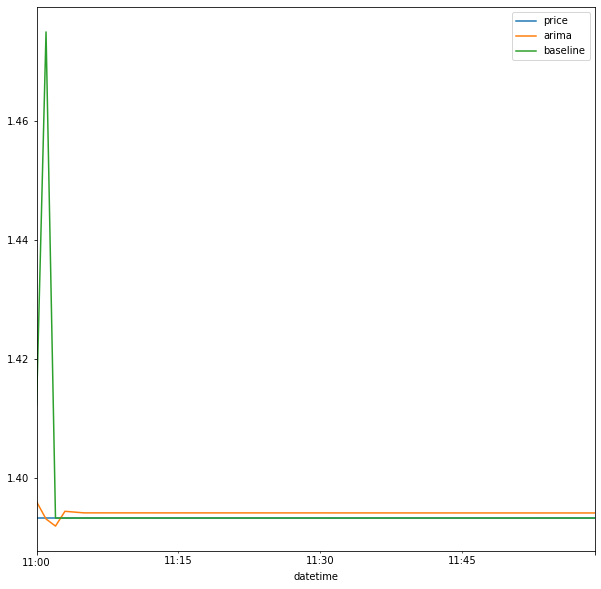

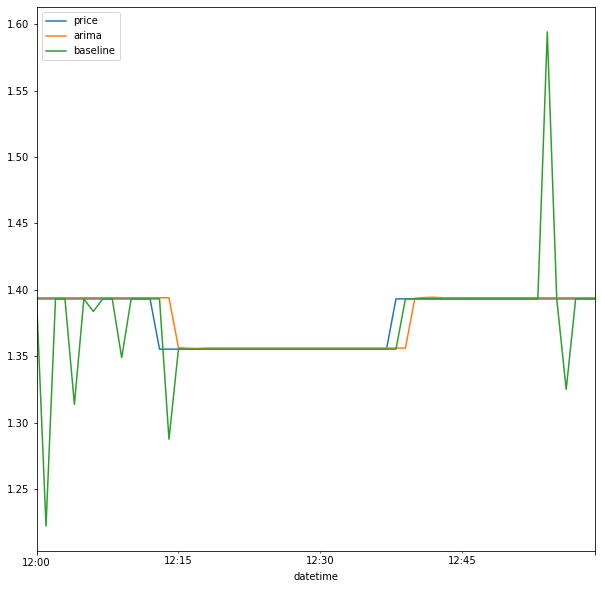

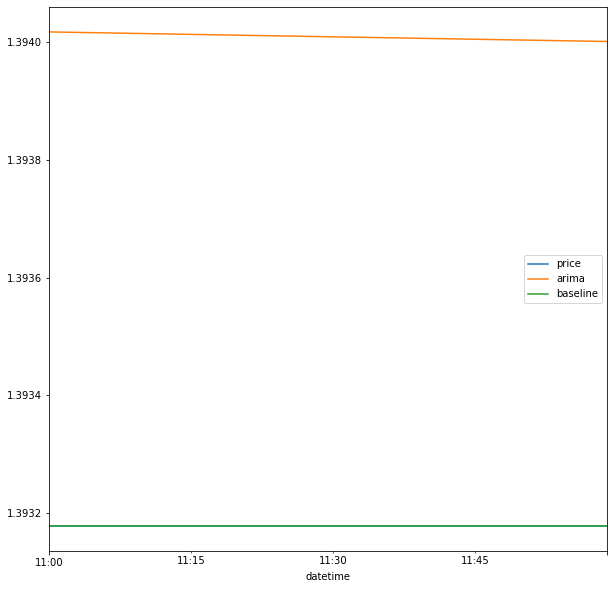

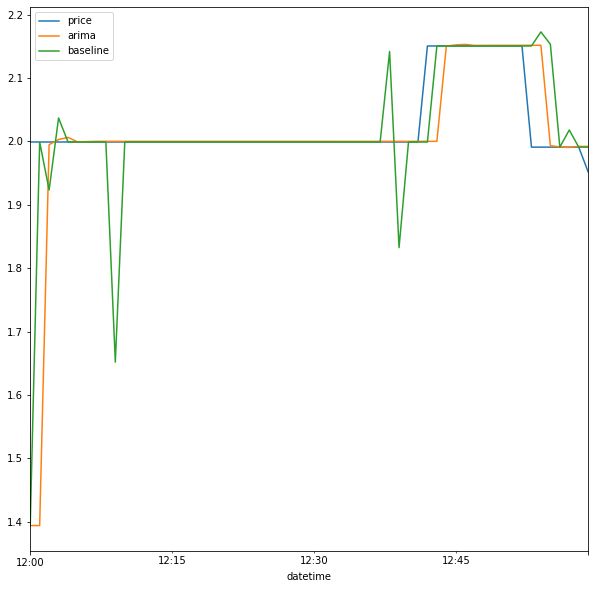

In [9]:
res2.groupby('session_id')[['price', 'arima', 'baseline']].plot(figsize=(10, 10));

На первом датасете ARIMA показывает себя значительно лучше бейзлайна, однако на втором немного уступает ему.
Однако после визуализации результатов у меня сложилось впечатление, что эта метрика не отражает действительности. Да,  ARIMA уступает в некоторых случаях из-за большего лага, но предсказания бейзлайна значительно более шумные. Модель, выбранная по такому критерию может давать нам ложный сигнал на покупку, чего в реальной жизни не хотелось бы.